- 07_ERP.zip 파일을 압축 해제하여, 해당 3개의 데이터 파일을 불러와 아래의 분석을 실시하시오.
- 해당 데이터는 생필품을 납품하는 회사의 ERP Enterprise Resource Planning(전사적 자원 관리)에서 발생한, 유통 관련 데이터이다.
- 07_ERP.zip 파일을 압축 해제하여, 해당 3개의 데이터를 불러와 아래와 같이 변환 하시오.

기간은 파일 상단에 적힌 기간월을 작성
Column 명 '합계'는 앞에 공백이 존재 ' 합계'

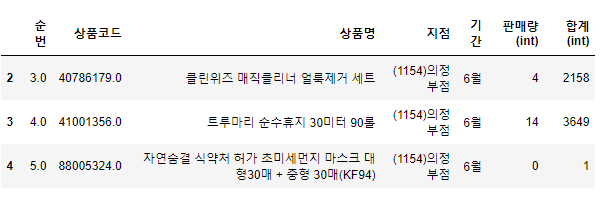

데이터 불러오기

In [103]:
import pandas as pd
df1=pd.read_excel("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/기간별상품매출현황_202306.xlsx")
df2=pd.read_excel("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/기간별상품매출현황_202307.xlsx")
df3=pd.read_excel("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/기간별상품매출현황_202308.xlsx")

데이터 확인

In [65]:
df1.head(3)

,조회기간-시작 = 20230601,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 636,Unnamed: 637,Unnamed: 638,Unnamed: 639,Unnamed: 640,Unnamed: 641,Unnamed: 642,Unnamed: 643,Unnamed: 644,Unnamed: 645
0,조회기간-종료 = 20230630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,순번,상품코드,상품명,합계,(1154)의정부점,(1155)별내점,(1156)풍산점,(1157)김포한강점,(1158)세종점,(1159)킨텍스점,...,(L21)위시티점,(L23)걸포동점,(L27)통일동산점,(L35)성대점,(L36)병점점,(L38)율전점,(L39)본오점,(L40)검암점,(L44)신길점,(L46)용호점
2,NaN,NaN,NaN,수량,수량,수량,수량,수량,수량,수량,...,수량,수량,수량,수량,수량,수량,수량,수량,수량,수량


In [66]:
df2.head(3)

,조회기간-시작 = 20230701,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 642,Unnamed: 643,Unnamed: 644,Unnamed: 645,Unnamed: 646,Unnamed: 647,Unnamed: 648,Unnamed: 649,Unnamed: 650,Unnamed: 651
0,조회기간-종료 = 20230731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,순번,상품코드,상품명,합계,(1154)의정부점,(1155)별내점,(1156)풍산점,(1157)김포한강점,(1158)세종점,(1159)킨텍스점,...,(L21)위시티점,(L23)걸포동점,(L27)통일동산점,(L35)성대점,(L36)병점점,(L38)율전점,(L39)본오점,(L40)검암점,(L44)신길점,(L46)용호점
2,NaN,NaN,NaN,수량,수량,수량,수량,수량,수량,수량,...,수량,수량,수량,수량,수량,수량,수량,수량,수량,수량


In [67]:
df3.head(3)

,조회기간-시작 = 20230801,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 646,Unnamed: 647,Unnamed: 648,Unnamed: 649,Unnamed: 650,Unnamed: 651,Unnamed: 652,Unnamed: 653,Unnamed: 654,Unnamed: 655
0,조회기간-종료 = 20230831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,순번,상품코드,상품명,합계,(1154)의정부점,(1155)별내점,(1156)풍산점,(1157)김포한강점,(1158)세종점,(1159)킨텍스점,...,(L21)위시티점,(L23)걸포동점,(L27)통일동산점,(L35)성대점,(L36)병점점,(L38)율전점,(L39)본오점,(L40)검암점,(L44)신길점,(L46)용호점
2,NaN,NaN,NaN,수량,수량,수량,수량,수량,수량,수량,...,수량,수량,수량,수량,수량,수량,수량,수량,수량,수량


데이터 변환 함수 만들기

In [105]:
# 데이터 변환
def my_func(df,month):
    # df의 첫번째 행을 칼럼명으로 사용
    df.columns=df.iloc[1]
    # 불필요한 행 제거
    df=df.iloc[4:].reset_index(drop=True)
    # 칼럼에 있던 지점명을 인덱스별로 추출
    # id_vars는 기준이 되는 칼럼을 지정, value_vars는 녹여서 같이 행으로 들어갈 칼럼 지정
    # value_name을 통해 melt 상태에서의 칼럼명 바꾸기
    df=pd.melt(df,id_vars=['순번','상품코드','상품명',' 합계'],var_name='지점',value_name='판매량')
    # 기간 열 추가
    df['기간']=month
    # 상품코드에서 처음 5개의 0을 제거
    df['상품코드']=df['상품코드'].astype(str).str.replace('^00000', '', regex=True)
    # 상품코드와 순번을 float 타입으로 변환
    # 이때 소숫점 밑 한자리까지만 표현되도록 (e+nn 형태 방지)
    df['상품코드']=df['상품코드'].astype(float).apply(lambda x: f'{x:.1f}')
    df['순번']=df['순번'].astype(float)
    # 판매량과 합계를 int형으로 바꾸기
    df[['판매량',' 합계']]=df[['판매량',' 합계']].astype(int)
    # 열 순서 변경
    df=df[['순번', '상품코드', '상품명', '지점', '기간', '판매량', ' 합계']]
    return df

데이터 변환 적용

In [106]:
df1=my_func(df1,'6월')
df2=my_func(df2,'7월')
df3=my_func(df3,'8월')

In [107]:
# 6월, 7월, 8월 데이터를 하나로 합침
df= pd.concat([df1, df2, df3], ignore_index=True).reset_index(drop=True)

In [108]:
# 데이터 확인하기
df.head()

,순번,상품코드,상품명,지점,기간,판매량,합계
0,1.0,1801828.0,자연숨결 식약처 허가 초미세먼지 마스크 대형 60매(KF94),(1154)의정부점,6월,174,65402
1,2.0,1801859.0,블루방역황사마스크 65매 KF94,(1154)의정부점,6월,0,1
2,3.0,40786179.0,클린위즈 매직클리너 얼룩제거 세트,(1154)의정부점,6월,4,2158
3,4.0,41001356.0,트루마리 순수휴지 30미터 90롤,(1154)의정부점,6월,14,3649
4,5.0,88005324.0,자연숨결 식약처 허가 초미세먼지 마스크 대형30매 + 중형 30매(KF94),(1154)의정부점,6월,0,1


In [119]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df.shape)
# 데이터가 잘 합쳐졌는지 확인

(73830, 7)
(78408, 7)
(84760, 7)
(236998, 7)


## 1 
**'지점' 중 '판매량'의 합이 가장 높은 2개 지점을 확인하시오.**

In [110]:
df.groupby('지점')['판매량'].sum().sort_values(ascending=False)[:2]

지점
(610)부천점    67612
(600)안양점    62987
Name: 판매량, dtype: int64

## 2
**앞서 확인한, 2개의 지점의 '판매량'에 대해 각각 정규성 검정을 수행하고, 결론을 작성하시오.**

In [113]:
import scipy.stats as stats
df_b=df.loc[df['지점']=='(610)부천점']
df_o=df.loc[df['지점']=='(600)안양점']

In [121]:
stats.normaltest(df_b['판매량'])

NormaltestResult(statistic=np.float64(392.59371327162387), pvalue=np.float64(5.6151110292193245e-86))

h0: 부천점 지점 데이터의 판매량이 정규분포를 따름

이때 pvalue<a (a=0.05)이므로 h0 reject; 부천점 지점 데이터의 판매량은 정규분포를 따르지 않음

In [115]:
stats.normaltest(df_o['판매량'])

NormaltestResult(statistic=np.float64(291.630042482356), pvalue=np.float64(4.71347161815466e-64))

h0: 안양점 지점 데이터의 판매량이 정규분포를 따름

이때 pvalue<a (a=0.05)이므로 h0 reject; 안양점 지점 데이터의 판매량은 정규분포를 따르지 않음

## 3
**앞서 확인한, 2개의 지점의 '판매량'의 대표값(중앙값)의 차이를 계산하고자 한다. 가설을 수립하고, Rank Sum Test를 이용해 가설검정을 수행하시오 .**

In [368]:
stats.ranksums(df_b['판매량'],df_o['판매량'])

RanksumsResult(statistic=np.float64(0.23404972309949237), pvalue=np.float64(0.8149463770358858))

h0: 두 지점의 판매량의 중앙값 차이가 없음

이때 pvalue>a (a=0.05)이므로 h0 accept; 두 지점의 중앙값 차이가 없음

부천점 지점의 판매량의 중앙값: 0.0
안양점 지점의 판매량의 중앙값: 0.0


Text(0.5, 1.0, '안양점 판매량 히스토그램')

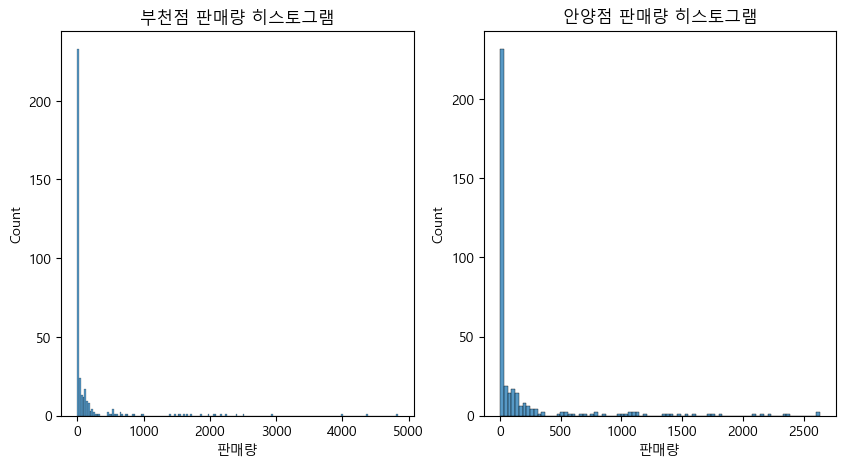

In [129]:
# 실제 중앙값 확인
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('font',family='Malgun Gothic')
print('부천점 지점의 판매량의 중앙값:',df_b['판매량'].median())
print('안양점 지점의 판매량의 중앙값:',df_o['판매량'].median())
# 그래프 두개 한번에 보여주기
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(df_b['판매량'],ax=axes[0])
axes[0].set_title('부천점 판매량 히스토그램')

sns.histplot(df_o['판매량'],ax=axes[1])
axes[1].set_title('안양점 판매량 히스토그램')

두 지점 모두 판매량의 중앙값이 0이므로 중앙값의 차이가 없음

중앙값이 0인 데이터가 너무 많기 때문에 두 지점의 판매량의 중앙값 차이가 무의미할 것이라 판단

**판매량이 0인 칼럼을 제외하고 두 집단의 중앙값 차이 확인**

In [140]:
df_bx=df_b.loc[df_b['판매량']!=0]
df_ox=df_o.loc[df_o['판매량']!=0]
stats.ranksums(df_bx['판매량'],df_ox['판매량'])

RanksumsResult(statistic=np.float64(-2.4991082524377912), pvalue=np.float64(0.012450627158643967))

h0: 두 지점의 중앙값 차이가 없음

이때 pvalue<a (a=0.05)이므로 h0 reject; 두 지점의 중앙값 차이가 있음

In [142]:
# 실제 데이터 확인
print('부천점 지점의 판매량의 중앙값(판매량이 0인 값 제외):',df_bx['판매량'].median())
print('안양점 지점의 판매량의 중앙값(판매량이 0인 값 제외):',df_ox['판매량'].median())

부천점 지점의 판매량의 중앙값(판매량이 0인 값 제외): 106.5
안양점 지점의 판매량의 중앙값(판매량이 0인 값 제외): 138.0


## 4
**앞서 확인한, 2개의 지점의 '판매량'의 Histogram을 Plotly라이브러리로 시각화 하시오.**

In [131]:
df_b.head()

,순번,상품코드,상품명,지점,기간,판매량,합계
53360,1.0,1801828.0,자연숨결 식약처 허가 초미세먼지 마스크 대형 60매(KF94),(610)부천점,6월,835,65402
53361,2.0,1801859.0,블루방역황사마스크 65매 KF94,(610)부천점,6월,0,1
53362,3.0,40786179.0,클린위즈 매직클리너 얼룩제거 세트,(610)부천점,6월,19,2158
53363,4.0,41001356.0,트루마리 순수휴지 30미터 90롤,(610)부천점,6월,6,3649
53364,5.0,88005324.0,자연숨결 식약처 허가 초미세먼지 마스크 대형30매 + 중형 30매(KF94),(610)부천점,6월,0,1


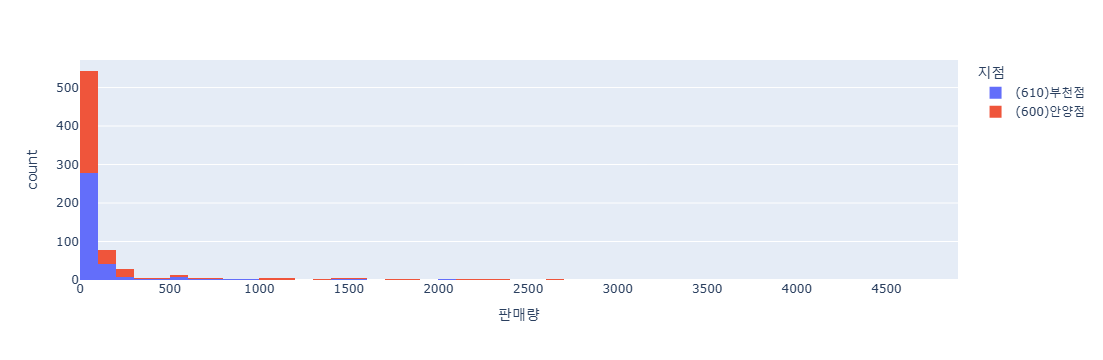

In [133]:
import plotly.express as px
%matplotlib inline
df_bo = pd.concat([df_b, df_o])
px.histogram(df_bo,'판매량',color='지점')

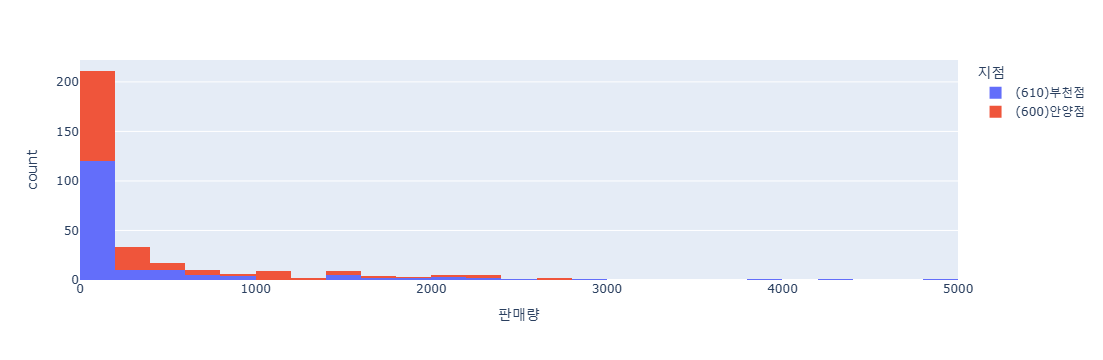

In [138]:
# 판매량이 0인 행 제거 후 히스토그램 확인
#df_bx=df_b.loc[df_b['판매량']!=0]
#df_ox=df_o.loc[df_o['판매량']!=0]

df_box = pd.concat([df_bx, df_ox])
px.histogram(df_box,'판매량',color='지점')

## 5
**'기간'별 가장 '판매량'의 '합'이 높은 '지점'을 확인하고, 특정 '기간' (월)을 입력했을 때, 해당 월의 '지점' 별 '판매량'의 합을 result_{월}.xlsx로 저장하는 함수를 생성하시오.**

In [160]:
# 기간별 가장 판매량의 합이 높은 지점 확인
# Sol1
# 기간과 지점별로 판매량의 합을 계산 후 각 기간의 판매량이 가장 높은 인덱스 추출
df.groupby(['기간','지점'])['판매량'].sum().groupby(level='기간').idxmax()

기간
6월    (6월, (610)부천점)
7월    (7월, (610)부천점)
8월    (8월, (740)속초점)
Name: 판매량, dtype: object

In [181]:
#Sol2
# 기간별 지점별 판매량의 합으로 새로운 데이터 프레임 생성
df_5=df.groupby(['기간','지점'])['판매량'].sum().reset_index()
# 데이터 프레임 확인
print(df_5.head())
# 기간별 지점별 판매량의 합이 가장 높은 행 추출
df_5.loc[df_5.groupby('기간')['판매량'].idxmax()]

   기간           지점    판매량
0  6월   (1154)의정부점   6829
1  6월    (1155)별내점   8374
2  6월    (1156)풍산점  12626
3  6월  (1157)김포한강점  11767
4  6월    (1158)세종점  10912


,기간,지점,판매량
464,6월,(610)부천점,20594
1112,7월,(610)부천점,22347
1778,8월,(740)속초점,26197


In [176]:
def my_func5():
    # 특정 기간 입력받기
    ans=input('특정 기간을 입력하세요(6,7,8월):')
    #  해당 월의 '지점' 별 '판매량'의 합을 result_{월}.xlsx로 저장하는 함수를 생성하시오
    # df 에서 특정 기간만 추출 
    df_ans=df.loc[df['기간']==ans]
    # 해당 월의 지점별 판매량의 합 계산
    df_fin=df_ans.groupby('지점')['판매량'].sum()
    # result_{월}.xlsx 형태로 저장
    df_fin.to_excel('C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/result_{}.xlsx'.format(ans))

함수 확인

In [177]:
my_func5()

특정 기간을 입력하세요(6,7,8월): 6월


In [182]:
pd.read_excel("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/result_6월.xlsx")

,지점,판매량
0,(1154)의정부점,6829
1,(1155)별내점,8374
2,(1156)풍산점,12626
3,(1157)김포한강점,11767
4,(1158)세종점,10912
...,...,...
637,(L38)율전점,1782
638,(L39)본오점,3129
639,(L40)검암점,1712
640,(L44)신길점,3189


## 6
**'상품명'에 '마스크'와'휴지' 제품을 나누어 분석하고자 한다. 상품명을 '휴지'와 '마스크'로 분류한 뒤, (나머지는 '기타') '상품분류'라는 파생변수를 만들어, 두 상품의 '판매량'의 대표값의 차이를 가설 검정 하시오.**

In [192]:
# 상품명을 휴지와 마스크로 분류
# 상품분류라는 파생변수 만들기, 이때 기본값을 기타로 초기화
df['상품분류']='기타'
# 문자열에 마스크를 포함할 경우 상품분류='마스크'
df.loc[df['상품명'].str.contains('마스크'),'상품분류']='마스크'
# 문자열에 휴지를 포함할 경우 상품분류='휴지'
df.loc[df['상품명'].str.contains('휴지'),'상품분류']='휴지'

In [194]:
# 파생변수가 잘 만들어졌는지 확인
df.head()

,순번,상품코드,상품명,지점,기간,판매량,합계,상품분류
0,1.0,1801828.0,자연숨결 식약처 허가 초미세먼지 마스크 대형 60매(KF94),(1154)의정부점,6월,174,65402,마스크
1,2.0,1801859.0,블루방역황사마스크 65매 KF94,(1154)의정부점,6월,0,1,마스크
2,3.0,40786179.0,클린위즈 매직클리너 얼룩제거 세트,(1154)의정부점,6월,4,2158,기타
3,4.0,41001356.0,트루마리 순수휴지 30미터 90롤,(1154)의정부점,6월,14,3649,휴지
4,5.0,88005324.0,자연숨결 식약처 허가 초미세먼지 마스크 대형30매 + 중형 30매(KF94),(1154)의정부점,6월,0,1,마스크


상품분류가 마스크, 휴지인 데이터로 나누어 각 판매량에 대한 정규성 검정

In [195]:
df_m=df.loc[df['상품분류']=='마스크']
df_h=df.loc[df['상품분류']=='휴지']

In [196]:
stats.normaltest(df_m['판매량'])

NormaltestResult(statistic=np.float64(31820.563309226873), pvalue=np.float64(0.0))


h0: 상품분류 마스크 데이터의 판매량이 정규분포를 따름

이때 pvalue<a (a=0.05)이므로 h0 reject; 상품분류 마스크 데이터의 판매량은 정규분포를 따르지 않음

In [198]:
stats.normaltest(df_h['판매량'])

NormaltestResult(statistic=np.float64(30664.231154107765), pvalue=np.float64(0.0))


h0: 상품분류 휴지 데이터의 판매량이 정규분포를 따름

이때 pvalue<a (a=0.05)이므로 h0 reject; 상품분류 휴지 데이터의 판매량은 정규분포를 따르지 않음

따라서 두 데이터의 판매량 모두 정규분포를 따르지 않으므로 Wilicoxon Test 진행

In [367]:
stats.ranksums(df_m['판매량'],df_h['판매량'])

RanksumsResult(statistic=np.float64(14.193416467479825), pvalue=np.float64(1.0063403187290814e-45))

h0: 두 집단간 판매량의 대표값에 차이가 없다.

이때 pvalue<유의수준a 0.05 이므로 h0 reject, 따라서 두 집단간 판매량의 대표값에 차이가 있다.

**아래는 CRM(Customer Relationship Management) 데이터에서 주로 사용하는 RFM 분석을 수행한 데이터이다.**

### ***RFM 분석***

RFM 분석은 고객 세분화를 위한 효과적인 도구로 사용되는 마케팅 분석 방법

- RFM은 Recency(최근성), Frequency(빈도), Monetary(금액)의 약어로, 이 세 가지 요소를 기반으로 고객을 분류하고 타겟팅하는 방법

    - Recency(최근성): 고객이 얼마나 최근에 구매를 했는지 (Recency 값이 낮으면 자주 방문하는 고객)
    - Frequency(빈도): 고객이 일정 기간 동안 얼마나 자주 구매를 하는지
    - Monetary(금액): 고객이 일정 기간 동안 얼마나 많은 금액을 소비했는지
- 각 R / F / M 값을 계산하여, 최종점수를 합산 -> 합산된 점수를 이용해 고객 분할

        - 환산점수로 분할 : 특정 기준 값을 정하고 고객 세그먼트
        - 사분범위로 분할 : Quantile 값을 기준으로 고객 세그먼트
  
*'11_Data.csv'데이터는 포장용기를 판매하는 회사에서 발생한 데이터이며, 포장용기를 온라인으로 구매한 고객들의 정보가 담긴 데이터이다.*

## 1
**'11_Data.csv' 데이터를 이용해, 최근성(Recency_int와)가 가장 높은 상위 10% 고객들의 성비와 평균 나이를 계산하시오.**

In [254]:
# 데이터 불러기기
df11=pd.read_csv("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/11_Data.csv")
# 불필요한 열 제거
df11.drop(df11.columns[[0, 1]], axis=1,inplace=True)
# 데이터 확인
df11.head(3)

,나이,성별,최종접속일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,주문자ID,Recency,Recency_int,Frequency,Monetary,Total,Rank
0,45,남자,2016-12-30 오후 5:57,블로그광고,PC,2016-12-30,개인,일반,0V00A1,30 days,30,11,678340,339181.2,B
1,53,남자,2017-01-02 오후 12:32,블로그광고,모바일,2017-01-01,개인,일반,1V00A1,153 days,153,10,799920,400007.9,B
2,28,남자,2017-02-26 오후 10:52,이메일광고,PC,2017-01-14,사업자,사업자,2V00A1,18 days,18,3105,247597550,123799401.4,A


In [255]:
# 최근성 상위 10% 고객 추출
df11_1=df11[df11['Recency_int']>=(df11['Recency_int'].quantile(0.90))]

In [261]:
print('최근성 상위 10% 고객들의 성비')
print(df11_1['성별'].value_counts(normalize=True))
print('\n최근성 상위 10% 고객들의 평균나이')
print(round(df11_1['나이'].mean(),3))

최근성 상위 10% 고객들의 성비
성별
남자    0.931452
여자    0.068548
Name: proportion, dtype: float64

최근성 상위 10% 고객들의 평균나이
39.839


## 2
**금액(Monetary)이 높은 1000명의 데이터를 추출하여, '사업자구분'에서 '개인'과 '사업자'간 주기성(Frequency)의 평균의 차이가 있는지 검정하시오.**

In [264]:
# 금액이 높은 1000명의 데이터 추출
df11_2=df11.nlargest(1000,'Monetary')

In [267]:
df11_21=df11_2[df11_2['사업자구분']=='개인']
df11_22=df11_2[df11_2['사업자구분']=='사업자']

In [268]:
stats.normaltest(df11_21['Frequency'])

NormaltestResult(statistic=np.float64(515.072386083056), pvalue=np.float64(1.423811419089051e-112))

In [269]:
stats.normaltest(df11_22['Frequency'])

NormaltestResult(statistic=np.float64(907.9680468295886), pvalue=np.float64(6.8745418272772e-198))

두 normaltest를 통해 사업자구분이 개인인 데이터와 사업자인 데이터 모두 주기성에 대해 정규성을 만족하지 못한다는 것을 알 수 있음

**비모수적 검정방법 Mann-Whitney U Test사용**

In [272]:
stats.mannwhitneyu(df11_21['Frequency'], df11_22['Frequency'], alternative='two-sided')

MannwhitneyuResult(statistic=np.float64(117437.5), pvalue=np.float64(0.7341984766573728))

h0: 두 집단의 주기성의 평균에 차이가 없음

이때 pvalue>a (a=0.05)이므로 h0 accept; 따라서 두 집단의 주기성의 평균에 차이가 없다고 할 수 있음 

In [274]:
# 실제 값 비교
print(df11_21['Frequency'].mean())
print(df11_22['Frequency'].mean())

29.511475409836066
37.833333333333336


## 3
**최근성(Recency_int와)과 금액(Monetary)간의 상관성을 확인하고자 한다. 성별에 따른 최근성과 금액의 산점도를 시각화 하고, 최근성과 금액 간 상관성이 있는지 가설 검정을 수행하시오.**

In [286]:
import warnings
# 경고 메시지 무시 설정
warnings.filterwarnings("ignore", category=UserWarning, message=".*Glyph 8722.*")

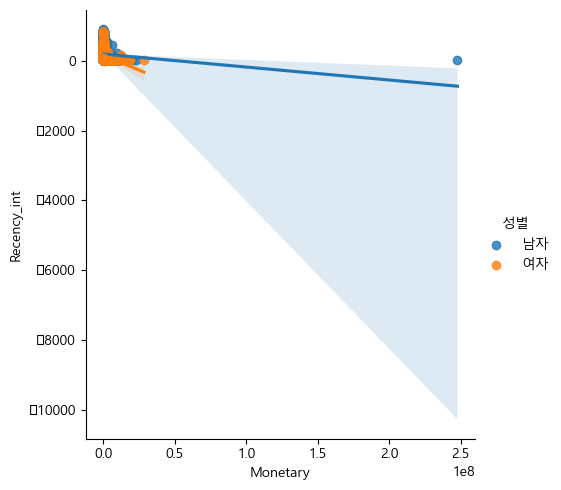

In [287]:
# 성별에 따른 최근성과 금액의 산점도 시각화
sns.lmplot(data=df11,x='Monetary',y='Recency_int',hue='성별')

In [288]:
stats.normaltest(df11['Monetary'])

NormaltestResult(statistic=np.float64(16457.520901727985), pvalue=np.float64(0.0))

h0(:Monetary의 분포가 정규성을 가짐)이 pvalue<a(=0.05)에서 기각

따라서 Monetary 분포는 정규성을 따르지 않음

In [289]:
stats.normaltest(df11['Recency_int'])

NormaltestResult(statistic=np.float64(1003.4450089983651), pvalue=np.float64(1.2725792844076955e-218))

h0(:Recency_int의 분포가 정규성을 가짐)이 pvalue<a(=0.05)에서 기각

따라서 Recency_int 분포는 정규성을 따르지 않음

## 4
**'유입경로'의 빈도수가 가장 높은 항목에 대해 Recency_int와 Frequency, Monetary의 기술 통계량을 계산하시오.**

In [297]:
# 유입결로 빈도수가 가장 많은 항목 찾기
best_path=df11['유입경로'].value_counts().idxmax()
df11_4=df11[df11['유입경로']==best_path]
# 세가지 연속형 변수의 기술 통계량 확인
df11_4[['Recency_int','Frequency','Monetary']].describe()

,Recency_int,Frequency,Monetary
count,952.000000,952.000000,9.520000e+02
mean,113.576681,13.600840,9.576875e+05
std,122.263297,25.226343,1.953218e+06
min,0.000000,1.000000,0.000000e+00
25%,35.000000,2.000000,1.258850e+05
50%,72.000000,5.000000,3.425350e+05
75%,142.000000,14.000000,8.921725e+05
max,856.000000,295.000000,2.293101e+07


## 5
**회원가입일과 최종접속일 데이터를 이용해 '접속기간'이라는 파생 변수를 생성하고, '접속기간'이 가장 오래된 100명의 고객 명단을 뽑아 result_vip_member.xlsx로 저장하시오.**

In [339]:
df11.head()

,나이,성별,최종접속일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,주문자ID,Recency,Recency_int,Frequency,Monetary,Total,Rank
0,45,남자,2016-12-30 오후 5:57,블로그광고,PC,2016-12-30,개인,일반,0V00A1,30 days,30,11,678340,339181.2,B
1,53,남자,2017-01-02 오후 12:32,블로그광고,모바일,2017-01-01,개인,일반,1V00A1,153 days,153,10,799920,400007.9,B
2,28,남자,2017-02-26 오후 10:52,이메일광고,PC,2017-01-14,사업자,사업자,2V00A1,18 days,18,3105,247597550,123799401.4,A
3,44,여자,2017-01-23 오후 6:25,블로그광고,PC,2017-01-17,사업자,사업자,3V00A1,23 days,23,24,2826660,1413341.7,A
4,40,남자,2018-12-19 오후 1:26,SNS광고,모바일,2017-01-17,사업자,사업자,4V00A1,28 days,28,45,2785020,1392527.4,A


In [342]:
# 최종접속일 열에서 오전/오후 전까지의 string 만 추출하기 (날짜까지만 사용하기 위해)
df11['최종 접속일자'] = df11['최종접속일'].str.split(' ').str[0]

In [351]:
# 회원가입일과 최종접속일 데이터를 이용해 접속기간 파생변수 생성
df11['접속기간']=pd.to_datetime(df11['최종 접속일자'])-pd.to_datetime(df11['회원 가입일'])

In [362]:
# 접속기간이 가장 오래된 100명의 고객 명단 뽑기
df11_5=df11.nlargest(100,'접속기간').reset_index(drop=True)
df11_5.to_excel("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/result_vip_member.xlsx",index=False)

In [363]:
# 데이터 불러와서 확인하기
pd.read_excel("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/result_vip_member.xlsx")

,나이,성별,최종접속일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,주문자ID,Recency,Recency_int,Frequency,Monetary,Total,Rank,최종 접속일자,접속기간
0,61,여자,2019-05-30 오후 3:28,인터넷기사광고,PC,2017-03-02,개인,일반,25V00A1,25 days,25,25,1315760,657892.5,B,2019-05-30,819
1,40,남자,2019-05-03 오전 4:06,인터넷기사광고,PC,2017-03-08,사업자,사업자,30V00A1,20 days,20,56,3289780,1644907.2,A,2019-05-03,786
2,40,남자,2019-05-13 오후 12:00,인터넷기사광고,PC,2017-03-29,개인,전화주문 고객,50V00A1,22 days,22,214,19956830,9978464.4,A,2019-05-13,775
3,40,남자,2019-05-03 오후 2:15,인터넷기사광고,PC,2017-03-21,사업자,특별회원,37V00A1,36 days,36,82,4385860,2192957.2,A,2019-05-03,773
4,39,여자,2019-05-17 오전 9:49,인터넷기사광고,PC,2017-04-09,사업자,사업자,59V00A1,23 days,23,30,1862550,931287.9,A,2019-05-17,768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,여자,2019-05-06 오후 12:54,기타,PC,2018-01-11,사업자,사업자,642V00A1,22 days,22,17,1714130,857075.0,A,2019-05-06,480
96,26,남자,2019-05-30 오전 10:55,잡지광고,모바일,2018-02-05,사업자,사업자,795V00A1,29 days,29,27,1941760,970894.1,A,2019-05-30,479
97,24,남자,2019-05-15 오전 9:08,이메일광고,PC,2018-01-23,개인,전화주문 고객,711V00A1,154 days,154,5,226880,113487.2,C,2019-05-15,477
98,40,남자,2019-05-30 오전 9:52,SNS광고,모바일,2018-02-07,개인,일반,810V00A1,22 days,22,37,2011500,1005764.0,A,2019-05-30,477
